In [19]:
#1. Bibliotheken importieren
import mysql.connector as mysql
import pandas as pd

In [20]:
"""cursor.execute("SHOW DATABASES")

for x in cursor:
  print(x)"""

'cursor.execute("SHOW DATABASES")\n\nfor x in cursor:\n  print(x)'

In [21]:
#Save password in file 'pw' (in this directory)
pw = pd.read_csv('pw',header=None).iloc[0,0]

In [22]:
db = mysql.connect(host="10.177.6.142", user="remote_user", passwd=pw, database="popular_movies")
cursor = db.cursor()

query = "SELECT * FROM movies;" ## Read from DB
cursor.execute(query)

df = pd.DataFrame(list(cursor), columns=['id', 'title', 'year'])

#for entry in cursor:
#    print(list(entry))

In [23]:
#2. DSatenbankverbindung aufbauen
db = mysql.connect(host="10.177.6.142", user="remote_user", passwd="_Dr!mdhUn7evfsnvZoxLA3!jXCbqrV", database="popular_movies")

#3. Cursor erstellen
cursor = db.cursor()

#4. Query preparieren
query = "SELECT * FROM movies;"

#5. Query ausführen
cursor.execute(query)

#6. Query in Tabelle Laden
df = pd.DataFrame(list(cursor), columns=['id', 'title', 'year'])

#7. Die ersten 10 Werte der Tabelle ausgeben 
df.head(10)

,id,title,year
0,1,Toy Story (1995),1995
1,2,Jumanji (1995),1995
2,3,Grumpier Old Men (1995),1995
3,4,Waiting to Exhale (1995),1995
4,5,Father of the Bride Part II (1995),1995
5,6,Heat (1995),1995
6,7,Sabrina (1995),1995
7,8,Tom and Huck (1995),1995
8,9,Sudden Death (1995),1995
9,10,GoldenEye (1995),1995


In [24]:
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [25]:
username='remote_user'
password=pw
domain='10.177.6.142'
database='popular_movies'

db_connection_str = f"mysql+pymysql://{username}:{password}@{domain}/{database}"
db_connection = create_engine(db_connection_str)

In [26]:
df = pd.read_sql('SELECT * FROM movies ORDER BY release_year', con=db_connection)

In [27]:
df.head(400)

,movieId,title,release_year
0,183665,The Moors Murders,-1
1,183709,Harvest,-1
2,183755,Basmati Blues,-1
3,183837,The Favourite,-1
4,183855,Terminal,-1
...,...,...,...
395,187379,Colleurs d'affiches (1897),1897
396,192967,Football (1897),1897
397,167504,"Fifth Avenue, New York (1897)",1897
398,167508,Mr. Edison at Work in His Chemical Laboratory ...,1897


Text(0.5, 1.0, 'Released movies over time')

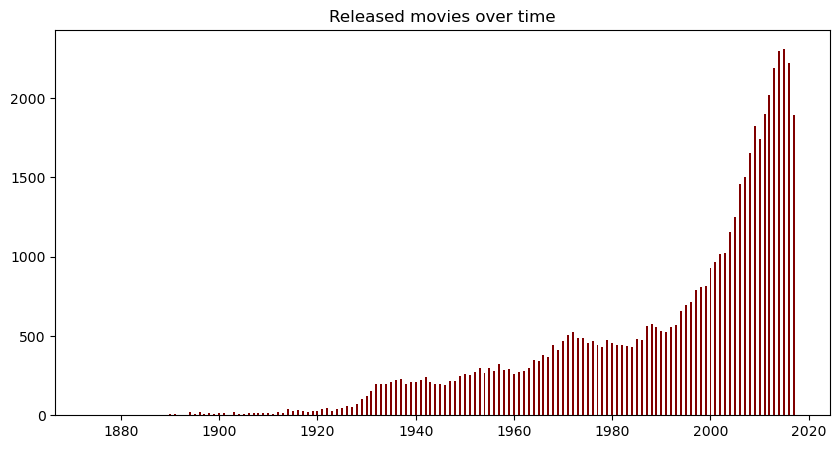

In [64]:
fig, ax = plt.subplots(figsize=(10,5))

year = pd.DataFrame(df['release_year'].drop_duplicates())
count = df.groupby(['release_year'])['movieId'].count()

year_count = pd.merge(year, count, on=["release_year", "release_year"])
year_count.rename(columns = {'movieId':'count'}, inplace=True)

year_count.drop(0, inplace=True)
year_count.drop(year_count.index[len(year_count)-1], inplace=True)

ax.bar(year_count['release_year'], year_count['count'], color ='maroon',
      width = 0.4)

ax.set_title("Released movies over time")
#ax.set_xlim(1850,2018)

In [106]:
df.groupby(['release_year']).head()#['movieId'].count()

,movieId,title,release_year
0,183665,The Moors Murders,-1
1,183709,Harvest,-1
2,183755,Basmati Blues,-1
3,183837,The Favourite,-1
4,183855,Terminal,-1
...,...,...,...
57237,183589,Fifty Shades Freed (2018),2018
57238,183591,Winning Ticket (2018),2018
57239,183611,Game Night (2018),2018
57240,183613,Thoroughbreds (2018),2018


Text(0.5, 1.0, 'Released movies over time')

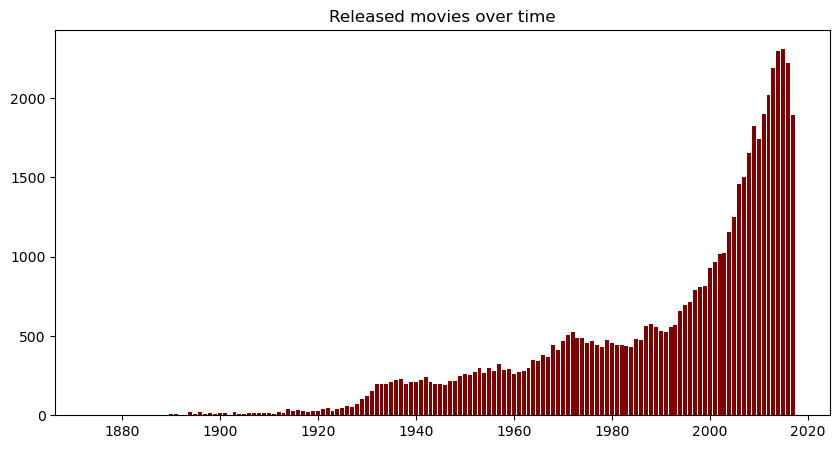

In [100]:
count = df.groupby(['release_year'])['movieId'].count()

test_fig, test_ax = plt.subplots(figsize=(10,5))

count = count.drop([-1])
count = count.drop([2018])

test_ax.bar(count.index, count.values, color ='maroon')

test_ax.set_title("Released movies over time")

In [54]:
df.groupby(['release_year']).head()

,movieId,title,release_year
0,183665,The Moors Murders,-1
1,183709,Harvest,-1
2,183755,Basmati Blues,-1
3,183837,The Favourite,-1
4,183855,Terminal,-1
...,...,...,...
57237,183589,Fifty Shades Freed (2018),2018
57238,183591,Winning Ticket (2018),2018
57239,183611,Game Night (2018),2018
57240,183613,Thoroughbreds (2018),2018


In [43]:
movies_with_genres = pd.read_sql("""SELECT m.movieId, m.title, g.genrename FROM movies as m 
INNER JOIN movies_genres as mg ON m.movieID = mg.movieId
INNER JOIN genres as g ON mg.genreId = g.genreId
ORDER BY m.movieId;""", con=db_connection)

In [68]:
genres = pd.read_sql("""SELECT * FROM genres;""", con=db_connection)

<BarContainer object of 19 artists>

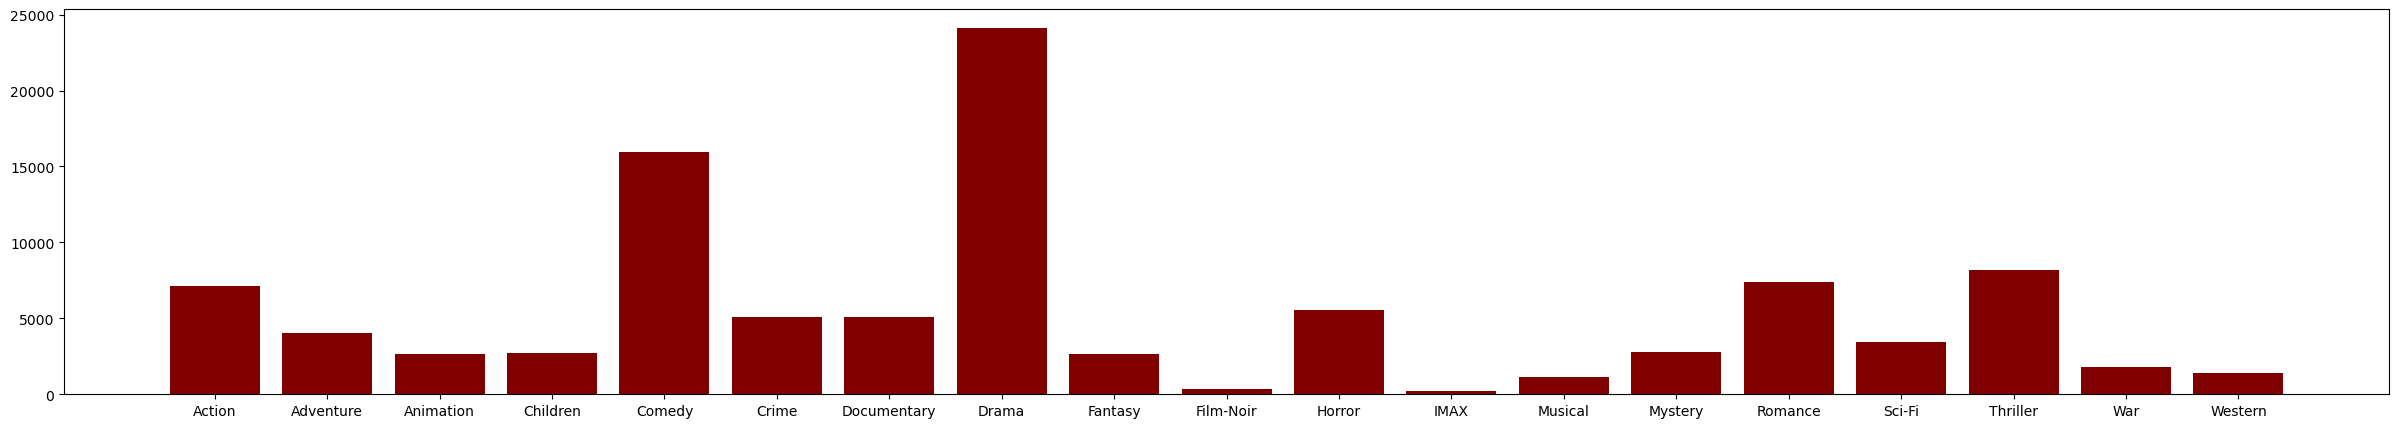

In [116]:
genres_count = movies_with_genres.groupby(['genrename'])['movieId'].count()

genres_count_fig, genres_count_ax = plt.subplots(figsize=(30,5))
#genres_count.head()
genres_count_ax.bar(genres_count.index, genres_count.values, color ='maroon')

In [71]:
genres.count()

genreId      19
genrename    19
dtype: int64